In [84]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sqlite3

In [8]:
db = sqlite3.connect('School.sqlite')
cur = db.cursor()

In [ ]:
cur.execute('CREATE TABLE Student (RollNumber int PRIMARY KEY,Name Text,Age int)')

In [9]:
cur.execute('INSERT INTO Student VALUES(101,"Aman",20)')

In [11]:
cur.execute('INSERT INTO Student VALUES(102,"Amit",21)')

In [12]:
db.commit()

In [13]:
db.close()

In [14]:
db2 = sqlite3.connect('Employee.sqlite')
cur2 = db.cursor()

In [15]:
cur2.execute('CREATE TABLE EmployeeDetails (employee_id int PRIMARY KEY,name Text,age int,department Text,salary int)')

In [18]:
cur2.execute('INSERT INTO EmployeeDetails VALUES(100,"Rishav",25,"Marketing",50000)')

In [20]:
cur2.execute('INSERT INTO EmployeeDetails VALUES(101,"Abhishek",26,"Operations",60000)')

In [22]:
cur2.execute('INSERT INTO EmployeeDetails VALUES(102,"Aman",24,"Human Resource",75000)')

In [23]:
db2.commit()

In [26]:
db1 = sqlite3.connect('School.sqlite')
cur1 = db1.cursor()

In [27]:
RollNumber = 103
Name = "Nikhil"
Age = 34
cur1.execute('INSERT INTO Student VALUES(?,?,?)',(RollNumber,Name,Age))
db1.commit()

In [29]:
values = [(105,"Nidhi",20),(106,"Manisha",21),(107,"Ankush",22)]
cur1.executemany('INSERT INTO Student VALUES (?,?,?)',values)
db1.commit()

In [30]:
new_age = 27
cur1.execute('UPDATE Student SET Age = ? WHERE Age = 20',(new_age,))
db1.commit()

In [31]:
db2 = sqlite3.connect('Employee.sqlite')
cur2 = db2.cursor()

In [33]:
id = 101
cur2.execute('DELETE FROM EmployeeDetails WHERE employee_id = ?',(id,))
db2.commit()

In [34]:
db2 = sqlite3.connect('Employee.sqlite')
cur2 = db2.cursor()
cur2.execute('DELETE FROM EmployeeDetails WHERE employee_id = 102')
db2.commit()

In [36]:
values = [(101,"Aadarsh",25,"Marketing",50000),(102,"Aarti",27,"Operations",60000),(103,"Siddharth",25,"Finance",85000),(104,"Aman",24,"Human Resource",75000),(105,"Amit",24,"Marketing",50000),(106,"Shivansh",26,"IT",90000),(107,"Vaihav",23,"Finance",85000),(108,"Himanshu",26,"IT",90000),(109,"Raman",25,"Operations",60000),(110,"Kunal",26,"Marketing",50000),(111,"Adhira",29,"Human Resource",50000),(112,"Tanya",24,"Marketing",50000)]
cur2.executemany('INSERT INTO EmployeeDetails VALUES(?,?,?,?,?)',values)
db2.commit()

In [37]:
db1 = sqlite3.connect('School.sqlite')
cur1 = db1.cursor()

In [40]:
cur1.execute('SELECT * FROM Student')
for row in cur1:
    print(row)

(101, 'Aman', 27)
(102, 'Amit', 21)
(103, 'Nikhil', 34)
(105, 'Nidhi', 27)
(106, 'Manisha', 21)
(107, 'Ankush', 22)


In [42]:
cur1.execute('SELECT * FROM Student')
cur1.fetchone()

(101, 'Aman', 27)

In [43]:
cur1.fetchmany(3)

[(102, 'Amit', 21), (103, 'Nikhil', 34), (105, 'Nidhi', 27)]

In [44]:
cur1.fetchall()

[(106, 'Manisha', 21), (107, 'Ankush', 22)]

In [45]:
cur1.execute('SELECT * FROM Student WHERE Name LIKE "A%"')
cur1.fetchall()

[(101, 'Aman', 27), (102, 'Amit', 21), (107, 'Ankush', 22)]

In [46]:
db2 = sqlite3.connect('Employee.sqlite')
cur2 = db2.cursor()

In [53]:
cur2.execute('SELECT employee_id FROM EmployeeDetails WHERE department = "Finance"')
ans = cur2.fetchall()
for i in ans:
    for j in i:
        print(j)

103
107


In [56]:
cur2.execute('SELECT department,count(employee_id) FROM EmployeeDetails GROUP BY department')
ans = cur2.fetchall()
for i in ans:
    for j in i:
        print(j,end=' ')
    print()

Finance 2 
Human Resource 2 
IT 2 
Marketing 5 
Operations 2 


In [2]:
db1 = sqlite3.connect('School.sqlite')
data = pd.read_sql_query('SELECT * FROM Student',db1)
data

,RollNumber,Name,Age
0,101,Aman,27
1,102,Amit,21
2,103,Nikhil,34
3,105,Nidhi,27
4,106,Manisha,21
5,107,Ankush,22


In [5]:
data[data['Age']==21]

,RollNumber,Name,Age
1,102,Amit,21
4,106,Manisha,21


In [6]:
data = pd.DataFrame([[201,"Aman","English",20000],[202,"Komal","Maths",22000],[203,"Mahesh","Science",23000]],columns=["ID","Name","Course","Salary"])
data

,ID,Name,Course,Salary
0,201,Aman,English,20000
1,202,Komal,Maths,22000
2,203,Mahesh,Science,23000


In [7]:
data.to_sql("Faculty",db1)

3

In [10]:
db1 = sqlite3.connect('School.sqlite')
data = pd.read_sql_query('SELECT * FROM Student',db1)
data['Address'] = 'Test'
data.to_sql("Student",db1,if_exists="replace")

6

# Problem 4 : Count Genre
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the count of each genre present in IMDB movie dataset?
Print the Genre and number of movies present in that genre.

Note: Ignore the empty value present in genre

In [33]:
db = sqlite3.connect('IMDB.sqlite')
genre_data = pd.read_sql_query('SELECT genre,count(genre) FROM genre GROUP BY genre',db)
genre_data = genre_data[genre_data["genre"]!='']
# print(genre_data)

for i in range(genre_data.shape[0]):
    print(genre_data.iloc[i,0],genre_data.iloc[i,1])
db.close()

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


# Problem 5 : IMDB Movie
'IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [56]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT IMDB.Movie_id,IMDB.Rating,earning.Domestic,earning.Worldwide FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id',db)
data['Total'] = data['Domestic'] + data['Worldwide']
max_rating = data.nlargest(1,['Total'])
max_rating.iloc[0,1]

8.1

# Problem 1 : IMDB Voted
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie.

In [60]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT Movie_id,Title,Rating,TotalVotes FROM IMDB',db)
most_voted = data.nlargest(1,['TotalVotes'])
print(most_voted.iloc[0,1],most_voted.iloc[0,2])

Inception (2010) 8.8


# Problem 2 : IMDB running time
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.

In [84]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT Title,Runtime FROM IMDB',db)
data = data[data['Runtime']!='']

data['Runtime'] = data['Runtime'].apply(lambda x: int(x.split(" ")[0]))
highest_runtime = data.nlargest(1,['Runtime'])
print(highest_runtime.iloc[0,0],highest_runtime.iloc[0,1])

The Wolf of Wall Street (2013) 180


# Problem 3 : IMDB profit
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [94]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT IMDB.Movie_id,IMDB.Title,IMDB.Budget,earning.Domestic,earning.Worldwide FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id',db)
data = data[data['Budget']!='']
data['Net_profit'] = data['Domestic'] + data['Worldwide'] - data['Budget']

max_profit = data.query('Net_profit == Net_profit.max()')
max_profit.iloc[0,1]

'Star Wars: The Force Awakens\xa0(2015)'

# Problem 4 : IMDB least budget
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the least budgeted movie in IMDB Movie Database.
If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [102]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT IMDB.Movie_id,IMDB.Title,IMDB.Budget,earning.Domestic,earning.Worldwide FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id',db)
data = data[data['Budget']!='']
data = data.query('Budget == Budget.min()')
data['Total'] = data['Domestic'] + data['Worldwide'] - data['Budget']
min_budget = data.query('Total == Total.max()')
min_budget.iloc[0,1]

'Short Term 12\xa0(2013)'

# Problem 5 : IMDB Year Top
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.

Note:Print the year in ascending order

In [52]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT IMDB.Movie_id,IMDB.Title,earning.Domestic,earning.Worldwide FROM IMDB INNER JOIN earning ON IMDB.Movie_id = earning.Movie_id',db)
data['Total'] = data['Domestic'] + data['Worldwide']
data['Year'] = data['Title'].apply(lambda x: x.split("(")[1])
data['Year'] = data['Year'].apply(lambda x: x.split(")")[0])
yearwise = data.groupby('Year')['Title','Total']

for year in yearwise:
    movie = year[1].nlargest(1,['Total'])['Title']
    print(year[0],movie.iloc[0])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)
The Unexpected Virtue of Ignorance Birdman or (The Unexpected Virtue of Ignorance) (2014)


C:\Users\Ajinkya\AppData\Local\Temp\ipykernel_5900\1029488526.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  yearwise = data.groupby('Year')['Title','Total']


# Problem 6 : IMDB genre budget
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off..

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

Action 17.98
Adventure 25.10
Animation 7.66
Biography 2.59
Comedy 7.22
Crime 1.77
Drama 10.85
Family 1.91
Fantasy 4.54
History 0.72
Horror 0.03
Music 0.15
Musical 0.25
Mystery 1.95
Romance 1.12
Sci-Fi 10.77
Sport 0.46
Thriller 3.99
War 0.36
Western 0.57


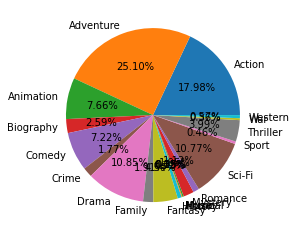

In [88]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT IMDB.Movie_id,IMDB.Title,IMDB.Budget,genre.genre FROM IMDB INNER JOIN genre ON IMDB.Movie_id = genre.Movie_id',db)
data['Budget'].replace('',0,inplace=True)
data = data[data['genre']!='']
genre_data = data.groupby('genre')['Budget'].sum()

genre = list(genre_data.index)
budget = []
for i in genre:
    budget.append(genre_data[i])

for i in range(len(genre)):
    print(genre[i],format(budget[i]*100/np.sum(budget),".2f"))

plt.pie(budget,labels=genre,autopct='%.2f%%')
plt.show()

# Problem 7 : IMDB genre earning
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


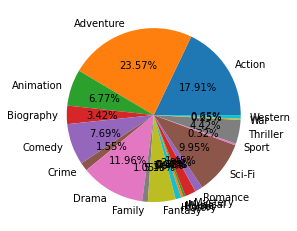

In [102]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT genre.Movie_id,genre.genre,earning.Domestic,earning.Worldwide FROM genre INNER JOIN earning ON genre.Movie_id = earning.Movie_id',db)
data['Total'] = data['Domestic'] + data['Worldwide']
data = data[data['genre']!='']
genre_wise = data.groupby('genre')['Total'].sum()

genre = list(genre_wise.index)
earnings = []
for i in genre:
    earnings.append(genre_wise[i])

for i in range(len(genre)):
    print(genre[i],format(earnings[i]*100/np.sum(earnings),".2f"))

plt.pie(earnings,labels=genre,autopct='%.2f%%')
plt.show()

# Problem 8 : IMDB Specific Genre
IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.

Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
Print the movie name.
Movies has multiple genre.

In [123]:
db = sqlite3.connect('IMDB.sqlite')
data = pd.read_sql_query('SELECT IMDB.Movie_id,IMDB.Title,IMDB.Rating,genre.genre FROM IMDB INNER JOIN genre ON IMDB.Movie_id = genre.Movie_id WHERE (genre = "Sci-Fi" AND Rating >= 8) OR (genre = "Mystery" AND Rating >= 8)',db)
print(data['Title'][0])

Arrival (2016)
